<a href="https://colab.research.google.com/github/n-goli/Phylo/blob/main/Kyle_%26_Nitin_BME_160_Final_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this installs BioPython to the notebook; necessary to run the following program
!pip install BioPython

# this installs Muscle to notebook
!sudo apt-get install muscle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.3 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  muscle
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 244 kB of archives.
After this operation, 709 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 muscle amd64 1:3.8.1551-2build1 [244 kB]
Fetched 244 kB in 1s (360 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unse

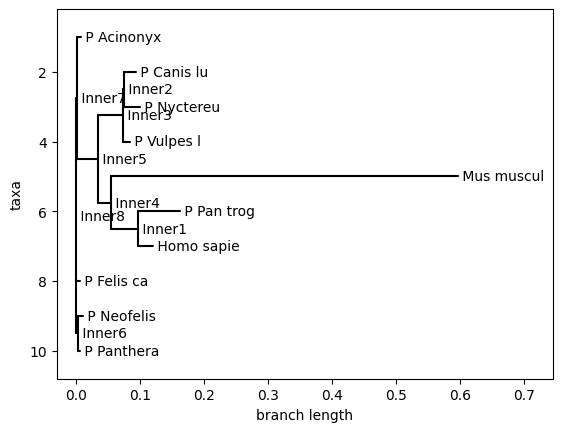

 , P Acinonyx
 |
 |        _ P Canis lu
 |      ,|
 |   ___||_ P Nyctereu
 |  |   |
 |__|   |_ P Vulpes l
 |  |
 |  |   __________________________________________________________ Mus muscul
 |  |__|
_|     |    ______ P Pan trog
 |     |___|
 |         |__ Homo sapie
 |
 | P Felis ca
 |
 , P Neofelis
 |
 | P Panthera



In [ ]:
from Bio.Align.Applications import MuscleCommandline
from Bio import AlignIO
from Bio import SeqIO
from Bio import Phylo
from Bio import Entrez
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

def sequence_getter(gene, species, resultnum=20): # This function gets the DNA sequences, as SeqRecord objects

    sequences = [] # empty list
    search = Entrez.esearch(db='nucleotide', term=f'{gene}[Gene Name] AND \"{species}\"[Organism]', retmax=resultnum) # searches Entrez genbank database for nucleotide sequences
    results = Entrez.read(search) # results are stored here
    primary_IDs = results['IdList']
    for sequence_IDs in primary_IDs:
        query = Entrez.efetch(db='nucleotide', id=sequence_IDs, rettype='gb', retmode='text')
        seqRecord = SeqIO.read(query, 'genbank')

        try:
            seqRecord.seq == None # raises an exception if the sequence is unknown/empty, skipping it

            # adjusting the id of the sequences makes the resulting tree more readable; however, this implementation is less robust
            # the subsequent line can be commented out if an identical name error is thrown
            seqRecord.id = 'P ' + seqRecord.description[11:] if "PREDICTED: " in seqRecord.description else seqRecord.description # manually trims the word "predicted" from results

            sequences.append(seqRecord)

        except:
            #print("Empty sequence skipped")
            pass

    return sequences

def main():

    # data collection and .phy formatting
    gene = 'SLC25A6' # common gene to be used in phylogeny

    combinedSequences = [] # holds all of the sequences obtained from searches
    # these are example species used for this program; can add or remove trivially
    combinedSequences += sequence_getter(gene, 'Homo sapiens', 1) # retrieves homo sapiens sequence for gene "SLC25A6"
    combinedSequences += sequence_getter(gene, 'Pan troglodytes', 1) # chimpanzee
    combinedSequences += sequence_getter(gene, 'Felis catus', 1) # cat
    combinedSequences += sequence_getter(gene, 'Felidae', 5) # various cats
    combinedSequences += sequence_getter(gene, 'Canidae', 5) # various dogs
    combinedSequences += sequence_getter(gene, 'Mus musculus', 1) # mouse

    SeqIO.write(combinedSequences, 'SRY_sequences.fasta', 'fasta') # writes fasta for retrieved sequences, which will make it easier to retrieve in subsequent runs

    muscleCline = MuscleCommandline(input='SRY_sequences.fasta', out='aligned.phy', phys=True)
    muscleCline()

    # tree assembly
    aln = AlignIO.read('aligned.phy', 'phylip-sequential') # this holds our MSA, to be passed into the distance matrix calculator; assumes a .phy file is passed

    distCalc = DistanceCalculator('identity') # this is a calculator object
    distMatrix = distCalc.get_distance(aln) # this evaluates our distance matrix for the given alignment

    treeConst = DistanceTreeConstructor() # this is a tree constructor object
    tree = treeConst.nj(distMatrix) # nj designates the neighbor-joining method for this tree. this turns our distance matrix into the phylogenetic tree

    Phylo.draw(tree) # displays the tree
    Phylo.draw_ascii(tree) # displays the tree, ascii format

    Phylo.write(tree, "ResultPhylogeny.tree", 'newick') # writes the tree to an output file, in Newick format

if __name__ == "__main__":
    main()

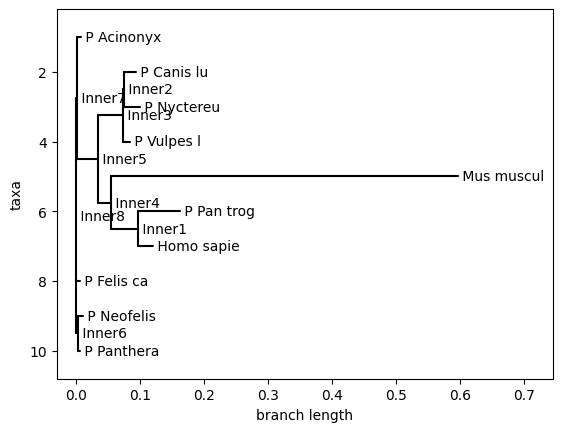

 , P Acinonyx
 |
 |        _ P Canis lu
 |      ,|
 |   ___||_ P Nyctereu
 |  |   |
 |__|   |_ P Vulpes l
 |  |
 |  |   __________________________________________________________ Mus muscul
 |  |__|
_|     |    ______ P Pan trog
 |     |___|
 |         |__ Homo sapie
 |
 | P Felis ca
 |
 , P Neofelis
 |
 | P Panthera



In [ ]:
# redraw a tree that was already created as ResultPhylogeny.tree
from Bio import AlignIO
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

tree = Phylo.read("ResultPhylogeny.tree", 'newick')
Phylo.draw(tree)
Phylo.draw_ascii(tree)